In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv("./Placement_Data_Full_Class.csv")
data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
data.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [3]:
data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


# Checeking for missing values in each column

data.isnull().sum()

In [4]:
# Preprocessing
# 1.Encodeing
# the gender we have both data (Male and Female ) as string so we need to change it
# The Workex has Yes or not type data so we need to change it
# specialization and  status are also string

In [5]:
data['gender']=data.gender.map({"M":0,"F":1})
data['workex']= data.workex.map({"No":0,'Yes':1})
data['status']= data.status.map({"Placed":1,"Not Placed":0})
data['specialisation']=data.specialisation.map({"Mkt&Fin":1,"Mkt&HR":0})

In [6]:
data

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,212,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,213,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,214,1,74.00,66.00,58.00,0,70.0,0,60.23,1


# Balance Dataset

In [7]:
data['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [59]:
data.duplicated().sum()  # No duplicate rows

0

In [60]:
data

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,212,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,213,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,214,1,74.00,66.00,58.00,0,70.0,0,60.23,1


In [9]:
# so we can see that the status has 1 for 148 and 0 for 67 so the data is not balanced that may cause some incompitable issues

In [10]:
from sklearn.utils import resample

In [11]:
#separate majority and minority classes
data_majority = data[data['status']==1]
data_minority =data[data['status']==0]

In [12]:
data_minority_upsampled=resample(data_minority,
                                 replace=True,n_samples=len(data_majority),random_state=42)
#combining majority class with upsampled minority class
balanced_data=pd.concat([data_majority,data_minority_upsampled])

In [13]:
balanced_data['status'].value_counts()


status
1    148
0    148
Name: count, dtype: int64

In [14]:
balanced_data

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.00,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.50,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.00,1,57.80,1
4,5,0,85.80,73.60,73.30,0,96.80,1,55.50,1
7,8,0,82.00,64.00,66.00,1,67.00,1,62.14,1
...,...,...,...,...,...,...,...,...,...,...
100,101,1,45.00,57.00,58.00,1,56.39,0,64.95,0
173,174,1,52.00,52.00,55.00,0,67.00,0,59.32,0
194,195,0,52.00,55.00,56.30,0,59.00,1,64.74,0
186,187,1,52.00,64.00,61.00,0,55.00,1,62.93,0


In [57]:
balanced_data.duplicated().sum()  # The duplicated values are the balanceing dataset rows

91

In [15]:
balanced_data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [16]:
# so basically by above step of value count we have counted the values 

# Train Test Split

In [17]:
# Separate feature and Target
X = balanced_data.copy().drop('status',axis=1)  #input column goes to x and tearget columns goes to y
Y = balanced_data['status'] # stattus is the main attribute to decide (if status is 1 than he is eligible and if status is 0 than he is not eligible)

In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((207, 9), (207,), (89, 9), (89,))

# Feature Scaling

In [19]:
# if the values in the columns has to be brought in a particular range of 0 or 1 than that is known as feature scaling
# nedded becuase we can see that the hsc_p has variation in values then our model would give inconsistant result and to overcome such issues we use feature scaling.
X_train

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
101,102,0,63.0,72.0,68.00,0,78.00,0,60.44
158,159,0,67.0,63.0,64.00,0,60.00,1,61.87
65,66,0,54.0,47.0,57.00,0,89.69,0,57.10
180,181,0,65.0,71.5,62.80,1,57.00,1,56.60
206,207,0,41.0,42.0,60.00,0,97.00,1,53.39
...,...,...,...,...,...,...,...,...,...
175,176,0,63.0,62.0,65.00,0,87.50,0,60.69
103,104,0,73.0,78.0,73.00,1,85.00,0,65.83
147,148,0,70.0,74.0,65.00,0,83.00,1,62.28
194,195,0,52.0,55.0,56.30,0,59.00,1,64.74


In [20]:
#Scale for each feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[0.4741784 , 0.        , 0.45454545, ..., 0.58333333, 0.        ,
        0.34595202],
       [0.74178404, 0.        , 0.53719008, ..., 0.20833333, 1.        ,
        0.39955022],
       [0.30516432, 0.        , 0.26859504, ..., 0.826875  , 0.        ,
        0.22076462],
       ...,
       [0.69014085, 0.        , 0.59917355, ..., 0.6875    , 1.        ,
        0.41491754],
       [0.91079812, 0.        , 0.22727273, ..., 0.1875    , 1.        ,
        0.50712144],
       [0.66666667, 0.        , 0.90909091, ..., 0.20833333, 1.        ,
        0.37781109]])

In [52]:
Y_train # just for viewing the value that it holds

101    1
158    0
65     0
180    1
206    0
      ..
175    0
103    1
147    1
194    0
142    1
Name: status, Length: 207, dtype: int64

In [22]:
# So we can see above that the X_train is a numpy array with many columns and the model will give equal importance

# Model 1- K-Nearest Neighbour

In [23]:
from  sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # we are keeping the three clusters
knn.fit(X_train,Y_train)
knn_Y_pred=knn.predict(X_test)

In [24]:
knn_Y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1], dtype=int64)

In [25]:
# To calculate the accuracy score

In [26]:
score=knn.score(X_test,Y_test)
score

0.8539325842696629

In [27]:
#Another method for accuracy score :-
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(knn_Y_pred,Y_test)
accuracy_score

0.8539325842696629

# Plotting the confusion Matrix

In [28]:
# confusion matrix define how best the given model classfies and misclassifies

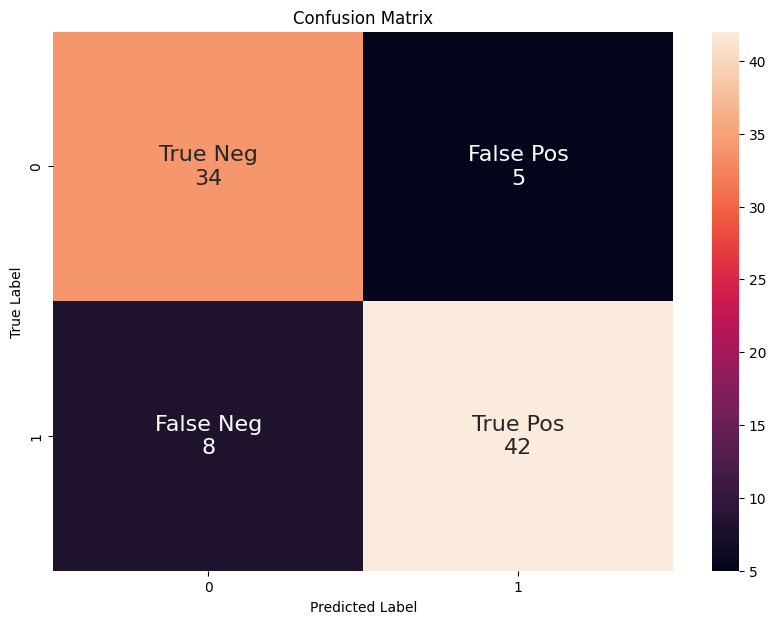

In [29]:
# pip uninstall matplotlib
# pip install matplotlib==3.7.3 --user
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(Y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [30]:
# in the above result we can see that the true negative is 34 means that for 0 true label 0 is the  predicted label that are correct so named True Negative.
# in the above result we can see that the false positive is 5 means that for 0 true label 1 is the predicted label that is not correct so named False Positive.
# in the above result we can see that the false negative is 8 means that for 1 true label 0 is predicted label that is not correct so for true value we got negative value in prediction so the name False negative.
# in the above result we can see that the True positive is 42 means that for 1 true label  1 is predicted label that is correct because our predicted result are equal to the true value so named True positive

# Model 2 - Decision Tree

In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test,Y_test)
decision_tree_accuracy

0.9325842696629213

In [32]:
#creating confusion matrix heatmap

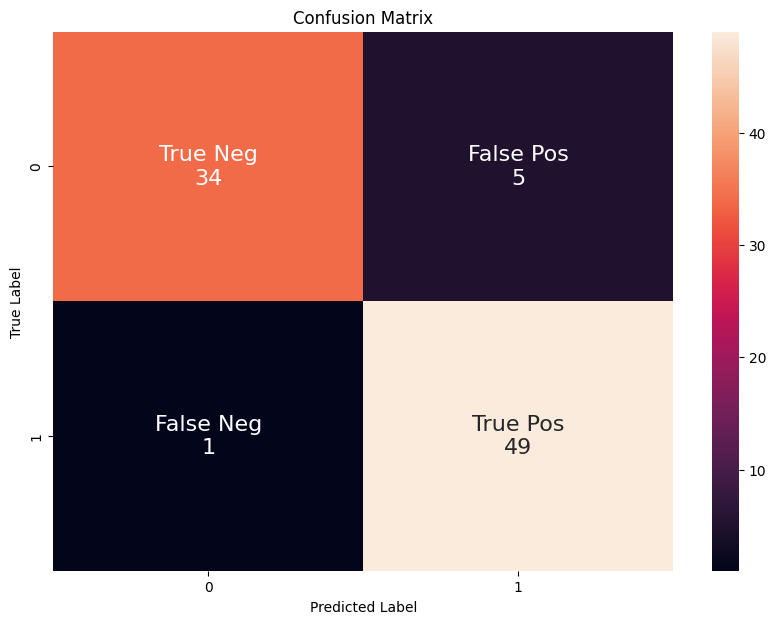

In [33]:
conf_mat = confusion_matrix(Y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [34]:
# so we can see that it has less value of false positive and false negative .

# Model3-SVM

In [35]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8764044943820225

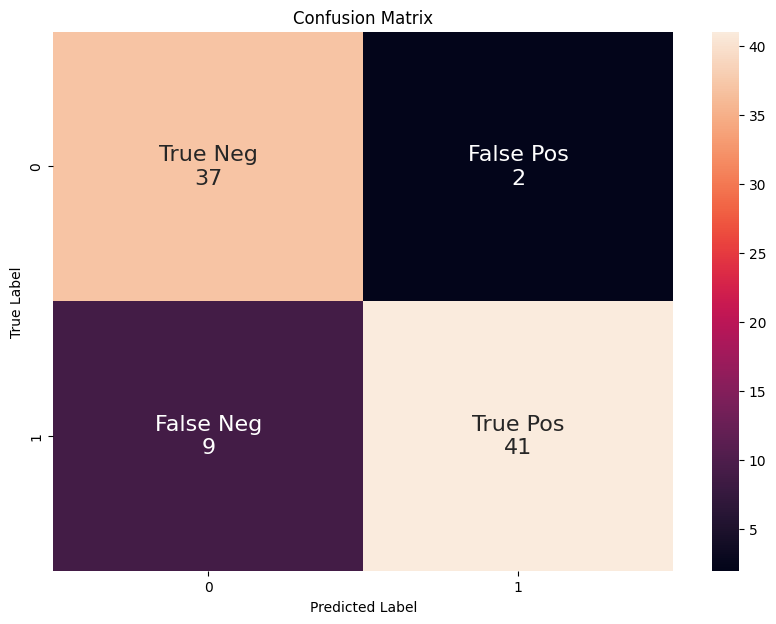

In [36]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Model4 - RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.9101123595505618

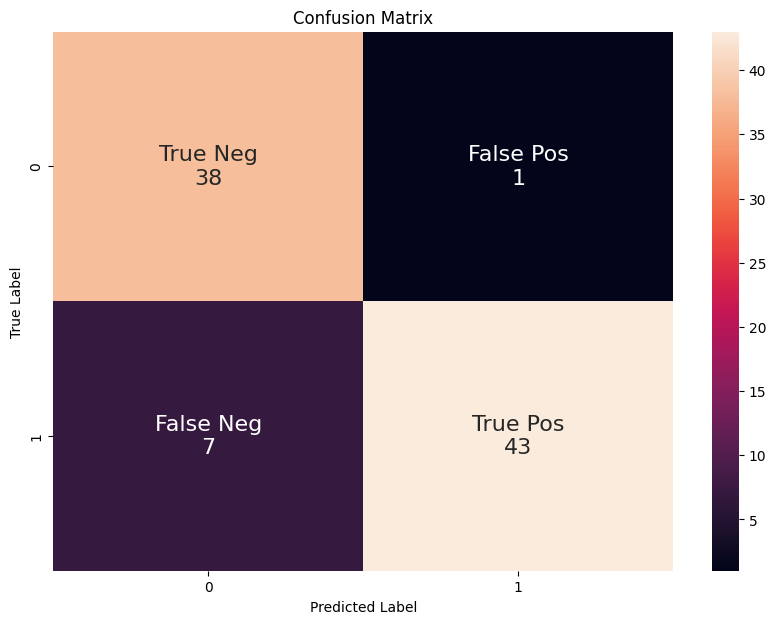

In [38]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Model 5:-Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy

0.7640449438202247

# Model 6:- Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
lg_Y_pred = lg.predict(X_test)
lg_accuracy = lg.score(X_test, Y_test)
lg_accuracy

0.8089887640449438

In [49]:
# so the decision tree gives the best result has it has the highest accuracy score but we are proceeding with random Forest 

# Single Input Predictions

In [42]:
# HERE WE TEST OUR RESULT FOR INDIVIDUAL DATASET GIVEN BY US

In [43]:
print("Predicted Class :",random_forest.predict(X_train[10].reshape(1,-1))[0])
print("Actual Class:",Y_test.iloc[10])

Predicted Class : 1
Actual Class: 0


In [44]:
print("Predicted Class :",random_forest.predict(X_train[25].reshape(1,-1))[0])
print("Actual Class:",Y_test.iloc[25])

Predicted Class : 1
Actual Class: 1


In [45]:
print("Predicted Class :",random_forest.predict(X_train[3].reshape(1,-1))[0])
print("Actual Class:",Y_test.iloc[3])

Predicted Class : 1
Actual Class: 1


In [46]:
# so the random forest performs nicely so we select the same model

 # Predictive System

In [47]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    # above is the dictionary for data 
    data = pd.DataFrame(data)
    # converting the above data into dataframe
    print(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    # transforming the above  
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [50]:
#taking the test data for prediction as below
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not place')

not place


# Save Files

In [54]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))  # for saving the model so that it can be used in flask for web development
pickle.dump(scaler,open("scaler.pkl",'wb'))       # for saving the scaler so that it can be used in flask for web development